### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [545]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [546]:
data = pd.read_csv('data/coupons.csv')

In [547]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [548]:
# Display the DataFrame to check all columns
print(data.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

2. Investigate the dataset for missing or problematic data.

In [549]:
#Check for Missing Values
print(data.isnull())
print(data.isnull().sum())

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

In [550]:
#Check for Duplicate Rows
print(data.duplicated())
print(data.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Length: 12684, dtype: bool
74


In [551]:
#Check Data Types
print(data.dtypes)
data.info()

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------          

3. Decide what to do about your missing data -- drop, replace, other...

In [552]:
# Impute missing values in numerical columns with the median
numerical_columns = data.select_dtypes(include=['int64']).columns
for col in numerical_columns:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Impute missing values in categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = data.isnull().sum()
print(missing_values_after_imputation)

# Replace NAN with '0' (Zero)
data = data.dropna()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


C:\Users\Farru\AppData\Local\Temp\ipykernel_17928\335567683.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Farru\AppData\Local\Temp\ipykernel_17928\335567683.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

4. What proportion of the total observations chose to accept the coupon? 



In [553]:
# Calculate the proportion of total observations that chose to accept the coupon
accepted_coupons = data['Y'].sum()
total_observations = data.shape[0]
proportion_accepted = (accepted_coupons / total_observations)*100

print("Proportion of accepted coupons:", proportion_accepted)
# "Proportion of accepted coupons: 56% 

Proportion of accepted coupons: 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

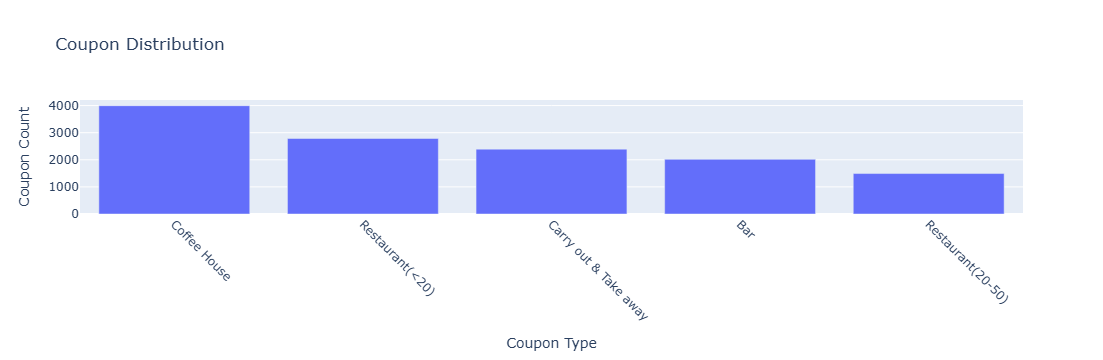

In [554]:
import pandas as pd
import plotly.express as px

coupon_counts = data['coupon'].value_counts()
# Convert the counts to a DataFrame for Plotly
coupon_counts_df = coupon_counts.reset_index()
coupon_counts_df.columns = ['coupon', 'count']

# Create a bar plot using Plotly
fig = px.bar(coupon_counts_df, x='coupon', y='count', title='Coupon Distribution', labels={'coupon': 'Coupon Type', 'count': 'Coupon Count'})

# Update layout for better visualization
fig.update_layout(xaxis_title='Coupon Type', yaxis_title='Coupon Count', xaxis_tickangle=45)
fig.show()
# Total count of coupons = 12684

6. Use a histogram to visualize the temperature column.

In [555]:
# Find unique strings in 'ColumnName' column
unique_strings = data['temperature'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
[55 80 30]


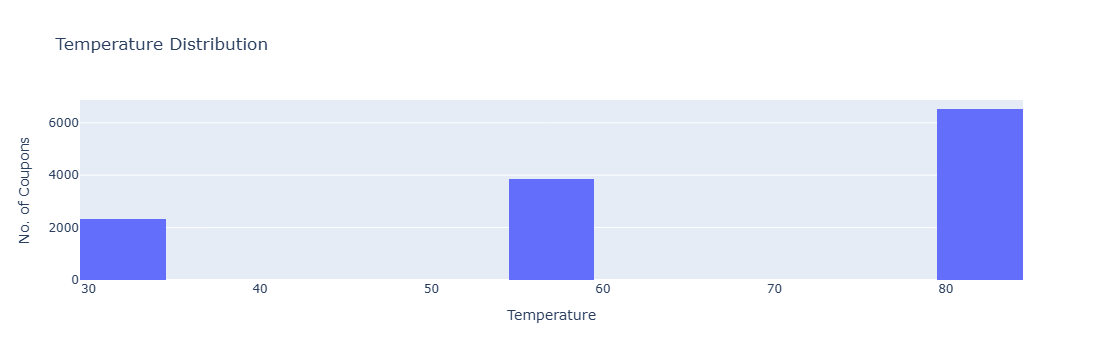

In [556]:
# Create a histogram for the 'temperature' column
# Create a histogram using Plotly
fig = px.histogram(data, x='temperature', nbins=20, title='Temperature Distribution', labels={'temperature': 'Temperature'})

# Update layout for better visualization
fig.update_layout(xaxis_title='Temperature', yaxis_title='No. of Coupons')

# Show the plot
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [557]:
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [558]:
#proportion of bar coupons were accepted i.e Y=1 for Bar only coupons

y_equals_1_df = bar_coupons_df[bar_coupons_df['Y'] == 1]

count_y_equals_1 = y_equals_1_df['Y'].sum()
# Print the filtered DataFrame
#print(y_equals_1_df)
count_y_equals_1
y_equals_1_df
# proportion of bar coupons were accepted i.e Y=1 for Bar only coupons = 827

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Proportion of bar coupons were accepted i.e Y=1 for Bar only coupons = 827
# Acceptance rate who went to a bar 3 or fewer times = 433/827 = 0.52 time
# Acceptance rate who went to a bar more than 3 times = 390/827 = 0.47 time
# Acceptance rate between who went to a bar 3 or fewer times & who went to a bar more than 3 times = 0.52/0.47 = 1.1 times

In [559]:
# To my understanding CarryAway column is "driver decides to go to Bar"
# Find unique strings in 'CarryAway' column
unique_strings = bar_coupons_df['CarryAway'].unique()
print("\nUnique strings:")
print(unique_strings)



Unique strings:
['1~3' '4~8' 'gt8' 'less1' 'never']


In [560]:
# Rename the column 'CarryAway' enteries

y_equals_1_df.loc[y_equals_1_df['CarryAway'].isin(['1~3', 'less1']), 'CarryAway'] = 'less3'

# Update '4~8' and 'gt8' to 'more3'
y_equals_1_df.loc[y_equals_1_df['CarryAway'].isin(['4~8', 'gt8']), 'CarryAway'] = 'more3'

print("\nDataFrame with updated 'CarryAway' column:")
print(y_equals_1_df)
unique_strings = bar_coupons_df['CarryAway'].unique()
print("\nUnique strings:")
print(unique_strings)


DataFrame with updated 'CarryAway' column:
           destination  passanger weather  temperature  time coupon  \
13                Home      Alone   Sunny           55   6PM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
75     No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
...                ...        ...     ...          ...   ...    ...   
12570  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12573  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12591  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12644  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12652             Home    Partner   Sunny           30  10PM    Bar   

      expiration  gender     age      maritalStatus  ...  CoffeeHouse  \
13            1d  Female      

In [561]:
# Filter the DataFrame to get only 'less3' rows on Column 'CarryAway'
bar_coupons_df_less3 = y_equals_1_df[y_equals_1_df['CarryAway'] == 'less3']
# Count the number of 'less3' entries
less3_count = len(bar_coupons_df_less3)

# Display the count
print(f"\nNumber of 'less3' entries: {less3_count}")
# Proportion of bar coupons were accepted i.e Y=1 for Bar only coupons = 827
#Acceptance rate who went to a bar 3 or fewer times = 433/827 = 0.52 time


Number of 'less3' entries: 433


In [562]:
# Filter the DataFrame to get only 'more3' rows on Column 'CarryAway'
bar_coupons_df_more3 = y_equals_1_df[y_equals_1_df['CarryAway'] == 'more3']
# Count the number of 'less3' entries
more3_count = len(bar_coupons_df_more3)

# Display the count
print(f"\nNumber of 'more3' entries: {more3_count}")
# Proportion of bar coupons were accepted i.e Y=1 for Bar only coupons = 827
# Acceptance rate who went to a bar morfe than 3 times = 390/827 = 0.47 time


Number of 'more3' entries: 390


In [563]:
# Filter the DataFrame to get only 'never' rows on Column 'CarryAway'
bar_coupons_df_less3 = y_equals_1_df[y_equals_1_df['CarryAway'] == 'never']
# Count the number of 'less3' entries
never_count = len(bar_coupons_df_less3)

# Display the count
print(f"\nNumber of 'never' entries: {never_count}")


Number of 'never' entries: 4


In [564]:
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

# Acceptance rate who went to a bar 3 or fewer times = 433/827 = 0.52 time
# Acceptance rate who went to a bar 3 or fewer times = 390/827 = 0.47 time
# Rate_of_acceptance for drivers who go for bar 3 or fewer times a month to those who went more = less3_count/more3_count
# Rate of acceptance between those drivers who went to a bar 3 or fewer times a month to those who went more. = 1.10 times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [565]:
# Total Bar coupons = 2017
# Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 827/2017 = 0.41 time
# Acceptance rate between drivers who go to a bar more than once a month and are 25 and under the age of 25 = 243/2017 = 0.12 time
# Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 & are 25 and under the age of 25 = 0.41/0.12 = 3.4 time

In [566]:
# Find unique strings in 'CarryAway' column
unique_strings = y_equals_1_df['CarryAway'].unique()243
print("\nUnique strings:")
print(unique_strings)
y_equals_1_df

SyntaxError: invalid syntax (1943395418.py, line 2)

In [567]:
# Find unique strings in 'CarryAway' column
unique_strings = y_equals_1_df['age'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['21' '46' '26' '31' '50plus' '41' '36' 'below21']


In [568]:
y_equals_1_df.loc[y_equals_1_df['age'].isin(['21', 'below21']), 'age'] = 'less25'
y_equals_1_df.loc[y_equals_1_df['age'].isin(['46', '26', '31', '50plus', '41', '36']), 'age'] = 'more25'
y_equals_1_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,less25,Unmarried partner,...,never,less3,4~8,1~3,1,0,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,more25,Married partner,...,1~3,less3,1~3,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,less25,Single,...,never,less3,1~3,less1,1,1,0,0,1,1
12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,less25,Single,...,never,less3,1~3,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,more25,Divorced,...,less1,less3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,more25,Married partner,...,never,more3,gt8,less1,1,1,0,0,1,1


In [569]:
# Filter the DataFrame with the specified conditions
y_equals_1_df_filtered_df = y_equals_1_df[
    ((y_equals_1_df['CarryAway'] !='never') &
     (y_equals_1_df['age'] == 'more25') )
]
y_equals_1_df_filtered_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,more25,Married partner,...,1~3,less3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,more25,Married partner,...,1~3,less3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7AM,Bar,1d,Male,more25,Married partner,...,1~3,less3,1~3,less1,1,1,1,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,more25,Unmarried partner,...,gt8,more3,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,more25,Unmarried partner,...,gt8,more3,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,more25,Unmarried partner,...,never,more3,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,more25,Unmarried partner,...,never,more3,4~8,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,more25,Divorced,...,less1,less3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,more25,Married partner,...,never,more3,gt8,less1,1,1,0,0,1,1


In [570]:
# Filter the DataFrame with the specified conditions
y_equals_1_df_filtered_df = y_equals_1_df[
    ((y_equals_1_df['CarryAway'] !='never') &
     (y_equals_1_df['age'] == 'less25') )
]
y_equals_1_df_filtered_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,less25,Unmarried partner,...,never,less3,4~8,1~3,1,0,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,1,1,0,1,1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,less25,Single,...,less1,less3,less1,1~3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,less25,Unmarried partner,...,never,more3,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,less25,Unmarried partner,...,never,more3,4~8,1~3,1,1,0,0,1,1
12569,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,less25,Single,...,never,less3,1~3,less1,1,1,0,0,1,1
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,less25,Single,...,never,less3,1~3,less1,1,1,0,0,1,1


In [571]:
# Find unique strings in 'Passanger' column

unique_strings = y_equals_1_df['passanger'].unique()
print("\nUnique strings:")
print(unique_strings)



Unique strings:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


In [572]:
# Find unique strings in 'age' column

unique_strings = y_equals_1_df['age'].unique()
print("\nUnique strings:")
print(unique_strings)



Unique strings:
['less25' 'more25']


In [573]:
# Find unique strings in 'occupation' column

= y_equals_1_df['occupation'].unique()
print("\nUnique strings:")
print(unique_strings)


SyntaxError: invalid syntax (245096813.py, line 3)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [574]:
filtered_df = y_equals_1_df[
    (y_equals_1_df['CarryAway'] == 'more3') &
    (y_equals_1_df['passanger'] != 'Kid(s)') &
    (y_equals_1_df['occupation'] != 'Farming, Fishing, Forestry')]

print("\nFiltered DataFrame:")
print(filtered_df)


Filtered DataFrame:
           destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
112    No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
123               Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12488  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12525  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12526  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12644  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12652             Home    Partner   Sunny           30  10PM    Bar   

      expiration  gender     age      maritalStatus  ...  CoffeeHouse  \
24            1d    Male  less25             Single  

In [575]:
filtered_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,1,1,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,more25,Unmarried partner,...,gt8,more3,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,more25,Unmarried partner,...,gt8,more3,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,more25,Unmarried partner,...,never,more3,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,less25,Unmarried partner,...,never,more3,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,less25,Unmarried partner,...,never,more3,4~8,1~3,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,more25,Married partner,...,never,more3,gt8,less1,1,1,0,0,1,1


In [576]:
# compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other 
# than farming, fishing, or forestry.
# Proportion of bar coupons were accepted i.e Y=1 for Bar only coupons = 827
# Rate_of_acceptance_with_more3_bar_no_kids_no_3F = 370/827 = 0.44 time

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [577]:
# Find unique strings in 'maritalStatus' column
unique_strings = y_equals_1_df['maritalStatus'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


In [578]:
# Find unique strings in 'income' column
unique_strings = y_equals_1_df['income'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['$37500 - $49999' '$62500 - $74999' '$75000 - $87499' '$12500 - $24999'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [579]:
# Find unique strings in 'age' column
unique_strings = y_equals_1_df['age'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['less25' 'more25']


In [580]:
# Find unique strings in 'RestaurantLessThan20' column
unique_strings = y_equals_1_df['RestaurantLessThan20'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['4~8' '1~3' 'less1' 'gt8' 'never']


In [581]:
y_equals_1_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,less25,Unmarried partner,...,never,less3,4~8,1~3,1,0,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,less25,Single,...,less1,more3,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,more25,Married partner,...,1~3,less3,1~3,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,less25,Single,...,never,less3,1~3,less1,1,1,0,0,1,1
12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,less25,Single,...,never,less3,1~3,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,more25,Divorced,...,less1,less3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,more25,Married partner,...,never,more3,gt8,less1,1,1,0,0,1,1


In [582]:
# Find unique strings in 'ColumnName' column
unique_strings = y_equals_1_df['income'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['$37500 - $49999' '$62500 - $74999' '$75000 - $87499' '$12500 - $24999'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [583]:
# Renaming columns entries 
y_equals_1_df.loc[y_equals_1_df['CarryAway'].isin(['less3']), 'CarryAway'] = 'less3'
y_equals_1_df.loc[y_equals_1_df['passanger'].isin(['Alone','Friend(s)', 'Partner']),'passanger'] = 'NO_Kids'
y_equals_1_df.loc[y_equals_1_df['age'].isin(['21', '26', 'below21']), 'age'] = 'less30'
y_equals_1_df.loc[y_equals_1_df['age'].isin(['46','31','50plus','41' '36']), 'age'] = 'more30'
y_equals_1_df.loc[y_equals_1_df['RestaurantLessThan20'].isin(['1~3','less1','never']), 'RestaurantLessThan20'] = 'less4'
y_equals_1_df.loc[y_equals_1_df['RestaurantLessThan20'].isin(['4~8']), 'RestaurantLessThan20'] = 'more4'
y_equals_1_df.loc[y_equals_1_df['income'].isin(['$37500','$49999', '$12500', '$24999','$50000','$25000, $37499','Less than $12500']), 'income'] = 'less50K'
y_equals_1_df.loc[y_equals_1_df['income'].isin(['$62500', '$74999', '$75000', '$87499', '$62499', '$100000 or More','$87500','$99999']), 'income'] = 'more50K'
print("\nDataFrame with updated 'CarryAway' column:")
print(y_equals_1_df)


DataFrame with updated 'CarryAway' column:
           destination passanger weather  temperature  time coupon expiration  \
13                Home   NO_Kids   Sunny           55   6PM    Bar         1d   
24     No Urgent Place   NO_Kids   Sunny           80  10AM    Bar         1d   
35                Home   NO_Kids   Sunny           55   6PM    Bar         1d   
39                Work   NO_Kids   Sunny           55   7AM    Bar         1d   
75     No Urgent Place    Kid(s)   Sunny           80  10AM    Bar         1d   
...                ...       ...     ...          ...   ...    ...        ...   
12570  No Urgent Place   NO_Kids   Sunny           55  10PM    Bar         2h   
12573  No Urgent Place   NO_Kids   Rainy           55  10AM    Bar         1d   
12591  No Urgent Place   NO_Kids   Sunny           80  10PM    Bar         1d   
12644  No Urgent Place   NO_Kids   Sunny           55  10PM    Bar         2h   
12652             Home   NO_Kids   Sunny           30  10PM    Ba

In [584]:
# Data for drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed OR

# Filter the DataFrame with the specified conditions
filtered_df = y_equals_1_df[
    ((y_equals_1_df['CarryAway'] == 'more3') &
     (y_equals_1_df['passanger'] != 'Kid(s)') &
     (y_equals_1_df['maritalStatus'] != 'Widowed'))]

filtered_df[['passanger','coupon', 'age', 'maritalStatus', 'CarryAway', 'RestaurantLessThan20', 'income','Y']]


,passanger,coupon,age,maritalStatus,CarryAway,RestaurantLessThan20,income,Y
24,NO_Kids,Bar,less25,Single,more3,more4,$62500 - $74999,1
35,NO_Kids,Bar,less25,Single,more3,more4,$62500 - $74999,1
39,NO_Kids,Bar,less25,Single,more3,more4,$62500 - $74999,1
112,NO_Kids,Bar,more25,Unmarried partner,more3,less4,$50000 - $62499,1
123,NO_Kids,Bar,more25,Unmarried partner,more3,less4,$50000 - $62499,1
...,...,...,...,...,...,...,...,...
12488,NO_Kids,Bar,more25,Unmarried partner,more3,more4,$50000 - $62499,1
12525,NO_Kids,Bar,less25,Unmarried partner,more3,more4,$12500 - $24999,1
12526,NO_Kids,Bar,less25,Unmarried partner,more3,more4,$12500 - $24999,1
12644,NO_Kids,Bar,more25,Married partner,more3,gt8,more50K,1


In [585]:
# Data for drivers go to bars more than once a month and are under the age of 30

# Filter the DataFrame with the specified 

filtered_df = y_equals_1_df[

    ((y_equals_1_df['CarryAway'] == 'more3') &
     (y_equals_1_df['age'] == 'less30'))
]

filtered_df[['passanger','coupon', 'age', 'maritalStatus', 'CarryAway', 'RestaurantLessThan20', 'income', 'Y']]


,passanger,coupon,age,maritalStatus,CarryAway,RestaurantLessThan20,income,Y


In [586]:
# Acceptance of coupon by "Driver go to bars more than once a month, had passengers that were not a kid, and were not widowed" = 370
# Acceptance of coupon by "Drive go to bars more than once a month and are under the age of 30" = 203
#Acceptance rate comparison between "go to bars more than once a month, had passengers that were not a kid, and were not widowed & "go to bars more than once a month and 
#are under the age of 30" = 370/203 = 1.8 time
#

In [587]:
# Data for drivers go to cheap restaurants more than 4 times a month and income is less than 50K

# Filter the DataFrame with the specified conditions
filtered_df = y_equals_1_df[

    ((y_equals_1_df['RestaurantLessThan20'] == 'gt8') &
     (y_equals_1_df['income'] == 'less50K'))
]

filtered_df[['passanger','coupon', 'age', 'maritalStatus', 'CarryAway', 'RestaurantLessThan20', 'income','Y']]
#row_count, column_count = filtered_df.shape


,passanger,coupon,age,maritalStatus,CarryAway,RestaurantLessThan20,income,Y
2119,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
2130,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
2134,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
6517,NO_Kids,Bar,less25,Single,less3,gt8,less50K,1
6531,NO_Kids,Bar,less25,Single,less3,gt8,less50K,1
10433,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
10438,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
10441,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
10445,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1
11520,NO_Kids,Bar,less25,Single,more3,gt8,less50K,1


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [588]:
# Overall 56% of coupons are accepted
# 41% acceptance rate for bar coupon i.e Total bar coupon = 2017. Total bar coupon accepted = 827
# Acceptance of coupon by "Driver go to bars more than once a month, had passengers that were not a kid, and were not widowed" = 370
# Acceptance of coupon by "Drive go to bars more than once a month and are under the age of 30" = 203
# Acceptance of coupon by "Drive go to cheap restaurants more than 4 times a month and income is less than 50K.
# Acceptance rate comparison between "go to bars more than once a month, had passengers that were not a kid, and were not widowed & "go to bars more than once a month and 
#are under the age of 30" = 370/203 = 1.8 time
# Coupon
# Coffee House             3996
# Restaurant(<20)          2786
# Carry out & Take away    2393
# Bar                      2017
# Restaurant(20-50)        1492

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [589]:
Coffee_House_coupons= data[data['coupon'] == 'Coffee House']
Coffee_House_coupons


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [590]:
# Find unique strings in 'CoffeeHouse' column
unique_strings = Coffee_House_coupons['CoffeeHouse'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['never' 'less1' '4~8' '1~3' 'gt8']


In [591]:
# Find unique strings in 'CoffeeHouse' column
unique_strings = Coffee_House_coupons['weather'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
['Sunny' 'Rainy' 'Snowy']


In [592]:
# Find unique strings in 'CoffeeHouse' column
unique_strings = Coffee_House_coupons['temperature'].unique()
print("\nUnique strings:")
print(unique_strings)


Unique strings:
[80 55 30]


In [593]:
Coffee_House_coupons['temperature'].astype(str)
Coffee_House_coupons.loc[Coffee_House_coupons['age'].isin(['21', '26', 'below21']), 'age'] = 'less30'
Coffee_House_coupons.loc[Coffee_House_coupons['age'].isin(['46','31','50plus','41' '36']), 'age'] = 'more30'
Coffee_House_coupons.loc[Coffee_House_coupons['CoffeeHouse'].isin(['never','less1','4~8','1~3']), 'CoffeeHouse'] = 'less8'
Coffee_House_coupons.loc[Coffee_House_coupons['CoffeeHouse'].isin(['gt8']), 'CoffeeHouse'] = 'more8'
Coffee_House_coupons.loc[Coffee_House_coupons['weather'].isin(['Sunny']), 'weather'] = 'Sunny'
Coffee_House_coupons.loc[Coffee_House_coupons['weather'].isin(['Rainy']), 'weather'] = 'Rainy'
Coffee_House_coupons.loc[Coffee_House_coupons['weather'].isin(['Snowy']), 'weather'] = 'Snowy'
print("\nDataFrame with updated 'CarryAway' column:")
print(Coffee_House_coupons)
Coffee_House_coupons


DataFrame with updated 'CarryAway' column:
           destination  passanger weather  temperature  time        coupon  \
1      No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12     No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15                Home      Alone   Sunny           80   6PM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
12656             Home      Alone   Snowy           30  10PM  Coffee House   
12659             Work      Alone   Snowy           30   7AM  Coffee House   
12674             Home      Alone   Rainy           55  10PM  Coffee House   
12675             Home      Alone   Snowy           30  10PM  Coffee House   
12681             Work      Alone   Snowy           30   7AM  Coffee House   

      expiration  g

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,more30,Married partner,...,less8,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,more30,Married partner,...,less8,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,less30,Single,...,less8,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,less30,Single,...,less8,1~3,4~8,1~3,1,1,0,0,1,0


In [594]:
Coffee_House_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   3996 non-null   object
 15  Bar                   3996 non-null   obje

In [595]:

Coffee_House_coupons_y_equals_1 = Coffee_House_coupons[Coffee_House_coupons['Y'] == 1]
Coffee_House_coupons_count_y_equals_1 = Coffee_House_coupons_y_equals_1['Y'].sum()
# Print the filtered DataFrame
#print(Coffee_House_coupons_count_y_equals_1)
Coffee_House_coupons_count_y_equals_1
Coffee_House_coupons_y_equals_1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,1,0,0,1,1
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,4~8,1~3,1,1,0,0,1,1
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,more30,Single,...,less8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,more30,Single,...,less8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,less30,Single,...,less8,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,more30,Divorced,...,less8,1~3,1~3,less1,1,0,0,1,0,1
12608,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,more30,Divorced,...,less8,1~3,1~3,less1,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,less30,Unmarried partner,...,less8,1~3,1~3,less1,1,0,0,1,0,1


In [596]:
# Total Coffee House coupons = 3996
# Accepted coupons = 1995
# Coffee House coupons acceptance rate = (1995/3996)*100 = 49.9% 

In [597]:

# Filter the DataFrame with the specified conditions
Coffee_House_coupons_y_equals_1_filtered_df = Coffee_House_coupons_y_equals_1[
    ((Coffee_House_coupons_y_equals_1['weather'] == 'Rainy'))
]

# Select and display the relevant columns
print("\nFiltered DataFrame:")
#print(Coffee_House_coupons_y_equals_1_filtered_df[['passanger', 'coupon', 'weather', 'temperature', 'Y']])
Coffee_House_coupons_y_equals_1_filtered_df[['passanger', 'coupon', 'weather', 'temperature', 'Y']]


Filtered DataFrame:


,passanger,coupon,weather,temperature,Y
6582,Kid(s),Coffee House,Rainy,55,1
6604,Kid(s),Coffee House,Rainy,55,1
6712,Kid(s),Coffee House,Rainy,55,1
6778,Kid(s),Coffee House,Rainy,55,1
6822,Kid(s),Coffee House,Rainy,55,1
...,...,...,...,...,...
12429,Alone,Coffee House,Rainy,55,1
12469,Alone,Coffee House,Rainy,55,1
12579,Alone,Coffee House,Rainy,55,1
12601,Alone,Coffee House,Rainy,55,1


In [598]:
# Filter the DataFrame with the specified conditions
Coffee_House_coupons_y_equals_1_filtered_df = Coffee_House_coupons_y_equals_1[
    ((Coffee_House_coupons_y_equals_1['weather'] == 'Snowy'))
]

# Select and display the relevant columns
print("\nFiltered DataFrame:")
#print(Coffee_House_coupons_y_equals_1_filtered_df[['passanger', 'coupon', 'weather', 'temperature', 'Y']])
Coffee_House_coupons_y_equals_1_filtered_df[['passanger', 'coupon', 'weather', 'temperature', 'Y']]


Filtered DataFrame:


,passanger,coupon,weather,temperature,Y
6596,Alone,Coffee House,Snowy,30,1
6679,Alone,Coffee House,Snowy,30,1
6701,Alone,Coffee House,Snowy,30,1
6792,Alone,Coffee House,Snowy,30,1
6836,Alone,Coffee House,Snowy,30,1
...,...,...,...,...,...
12455,Alone,Coffee House,Snowy,30,1
12476,Alone,Coffee House,Snowy,30,1
12565,Alone,Coffee House,Snowy,30,1
12608,Alone,Coffee House,Snowy,30,1


In [599]:
# Filter the DataFrame with the specified conditions
Coffee_House_coupons_y_equals_1_filtered_df = Coffee_House_coupons_y_equals_1[
    ((Coffee_House_coupons_y_equals_1['weather'] == 'Sunny'))
]

# Select and display the relevant columns
print("\nFiltered DataFrame:")
#print(Coffee_House_coupons_y_equals_1_filtered_df[['passanger', 'coupon', 'weather', 'temperature', 'Y']])
Coffee_House_coupons_y_equals_1_filtered_df[['passanger', 'coupon', 'weather', 'temperature', 'Y']]


Filtered DataFrame:


,passanger,coupon,weather,temperature,Y
12,Kid(s),Coffee House,Sunny,55,1
16,Alone,Coffee House,Sunny,55,1
21,Alone,Coffee House,Sunny,55,1
45,Friend(s),Coffee House,Sunny,80,1
48,Friend(s),Coffee House,Sunny,80,1
...,...,...,...,...,...
10737,Alone,Coffee House,Sunny,80,1
10740,Alone,Coffee House,Sunny,80,1
10741,Friend(s),Coffee House,Sunny,80,1
10754,Alone,Coffee House,Sunny,80,1


In [600]:
# Total Coffee Coupons = 3996
# Coupon acceptance on Rainy and Snowy days are 118 & 131 respectovely = Acceptance rates on Rainy days 118/3996 = 0.02 & 131/3993 = 0.03 on Snowy day 
# Coupon acceptance on Sunny days are 1746. Acceptance rate is 1746/3996 = 0.43
